# Customer Clustering and Exploratory Data Analysis for a Marketing Campaign


The project involves creating a segmentation model based on customer behavior and purchase patterns. The goal is to identify opportunities for higher campaign profits through targeted marketing efforts. By addressing specific customer needs, the project aims to boost satisfaction and loyalty, ultimately enhancing the overall effectiveness of the company's marketing strategy.

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import statistics
import warnings
warnings.filterwarnings("ignore")
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram
from pandas.plotting import parallel_coordinates
import seaborn as sns

In [365]:
df = pd.read_csv('C:/Users/sabri/cl/archive/marketing_campaign.csv', sep=";")
print("First 5 rows of the dataframe:")
df.head()

First 5 rows of the dataframe:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [366]:
#Information about the dataframe:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [367]:
print("Summary statistics of the dataframe:")
df.describe()

Summary statistics of the dataframe:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Data Preparation

### Missing Data

In [368]:
print("Missing data in the dataframe:")
print(df.isnull().sum())

Missing data in the dataframe:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [369]:
# Droped missing values as it only existed in one column and constitues small proprtion of the data
df = df.dropna()
df.duplicated().sum()

0

### Outliers

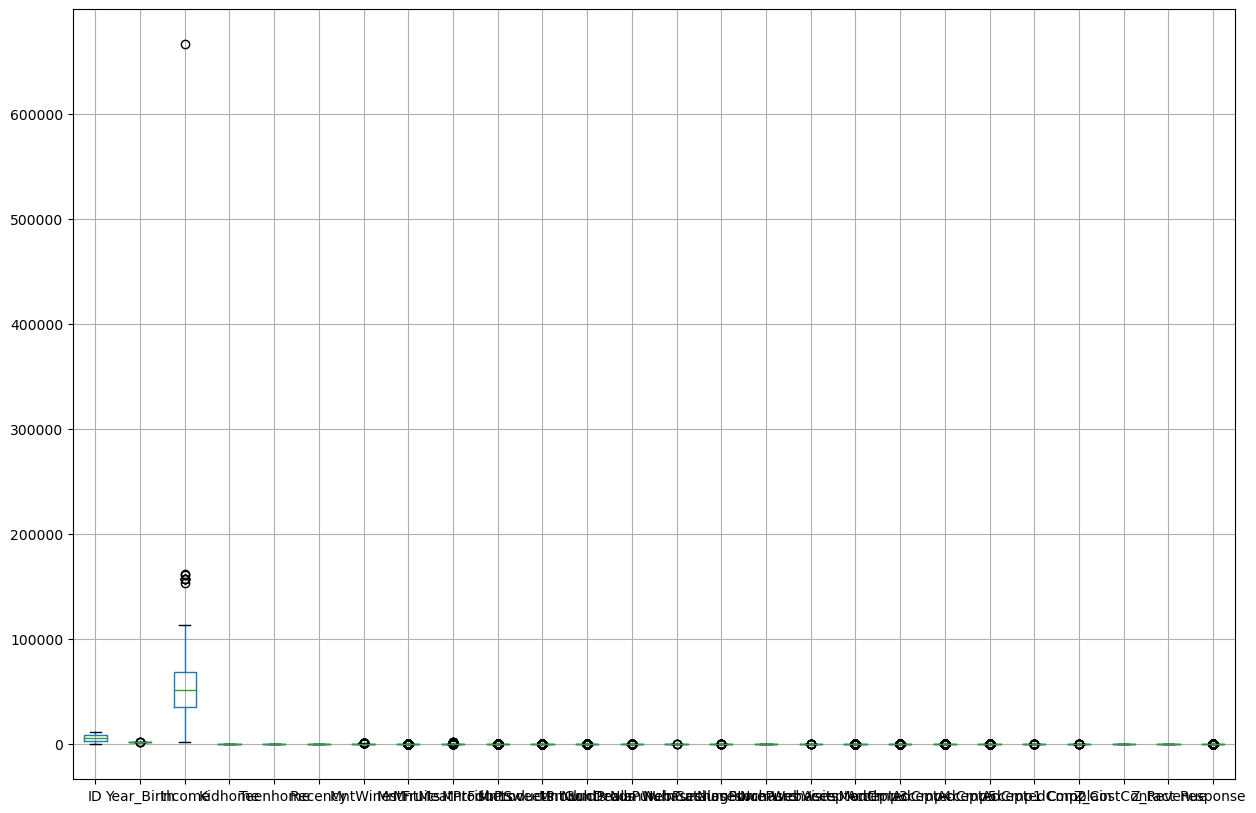

In [370]:
# Created a plot to show outliers
fig, ax = plt.subplots(figsize=(15, 10))
df.boxplot(ax=ax)
plt.show()

In [371]:
# Identify the outliers in the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]
print("outliers:", len(outliers))

outliers: 8


In [372]:
# Remove the outliers 
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

### Creating new features/columns

In [373]:
# Create new column with updated Marital Status
def MaritalStatus(marital_status):
    if marital_status in ['Single','Alone', 'Absurd', 'YOLO']:
        return 'Single'
    elif marital_status in ['Widow']:
        return 'Widow'
    elif marital_status in ['Divorced']:
        return 'Divorced'
    elif marital_status in ['Married']:
        return 'Married'
    else:
        return 'Together'

df['MaritalStatus'] = df['Marital_Status'].apply(MaritalStatus)

In [374]:
#Create new column with age 
df['Age'] = 2022 - df['Year_Birth']

In [375]:
def adulthome(marital_status):
    if marital_status in ['Married','Together']:
        return 2
    else:
        return 1
    
df['adulthome'] = df['Marital_Status'].apply(adulthome)

In [376]:
#Create household size column, joining adults, teens and kids columns 
df['hhsize'] = df['Kidhome']+ df['Teenhome'] + df['adulthome']

In [377]:
# Remove outliers
df = df[df['Age'] < 100]

In [378]:
#Total Spent
df['TotalSpent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']

In [379]:
#Total Accepted Campaigns 
df['AcceptedCmptotal'] = df['AcceptedCmp1']+df["AcceptedCmp2"] +df['AcceptedCmp3']+ df['AcceptedCmp4'] + df['AcceptedCmp5']

In [380]:
# drop unnecessary columns
df.drop(['Dt_Customer', 'ID', 'Marital_Status', 'Year_Birth', 'Z_CostContact', 'Z_Revenue','Kidhome','Teenhome', 'adulthome'], axis=1, inplace=True)

## Exploratory Data Analysis and Data Visualization# Exploratory data analysis

In [296]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Income               2205 non-null   float64
 2   Recency              2205 non-null   int64  
 3   MntWines             2205 non-null   int64  
 4   MntFruits            2205 non-null   int64  
 5   MntMeatProducts      2205 non-null   int64  
 6   MntFishProducts      2205 non-null   int64  
 7   MntSweetProducts     2205 non-null   int64  
 8   MntGoldProds         2205 non-null   int64  
 9   NumDealsPurchases    2205 non-null   int64  
 10  NumWebPurchases      2205 non-null   int64  
 11  NumCatalogPurchases  2205 non-null   int64  
 12  NumStorePurchases    2205 non-null   int64  
 13  NumWebVisitsMonth    2205 non-null   int64  
 14  AcceptedCmp3         2205 non-null   int64  
 15  AcceptedCmp4         2205 non-null   int64 

In [155]:
import plotly.express as px
fig0 = px.histogram(df, x="Income", nbins=50, title = 'Income Distribution')
fig0.show()

In [156]:
fig1 = px.histogram(df, x="Age", nbins=25, color='Age', title="Age Distribution")
fig1.show()

In [135]:
fig2 = px.histogram(df, x='Education', nbins=5, title="Education Level Distribution")
fig2.show()

In [133]:
fig3 = px.histogram(df, x='MaritalStatus', nbins=5, title="Marital Status Distribution")
fig3.show()

In [445]:
fig4 = px.histogram(df, x='hhsize', title = 'Number of Children in Household')
fig4.show()

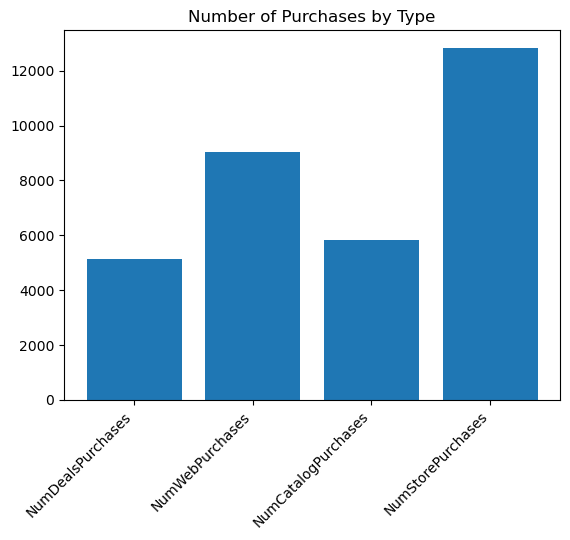

In [206]:
sumv = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
selsum = df[sumv].sum()
plt.bar(selsum.index, selsum.values)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Purchases by Type')
plt.show()

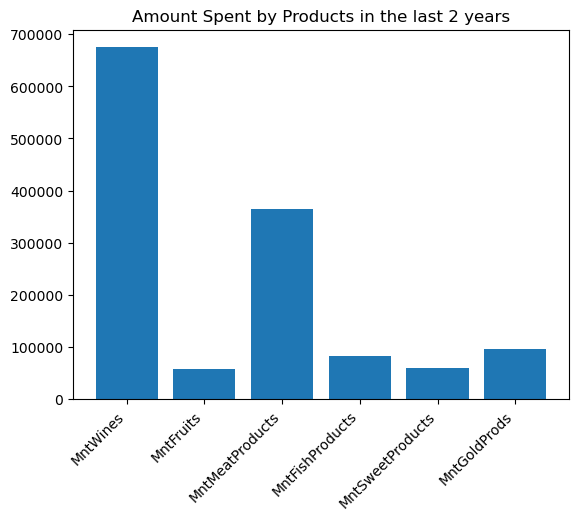

In [162]:
numse = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
selsum2 = df[numse].sum()
plt.bar(selsum2.index, selsum2.values)
plt.xticks(rotation=45, ha='right')
plt.title('Amount Spent by Products in the last 2 years')
plt.show()

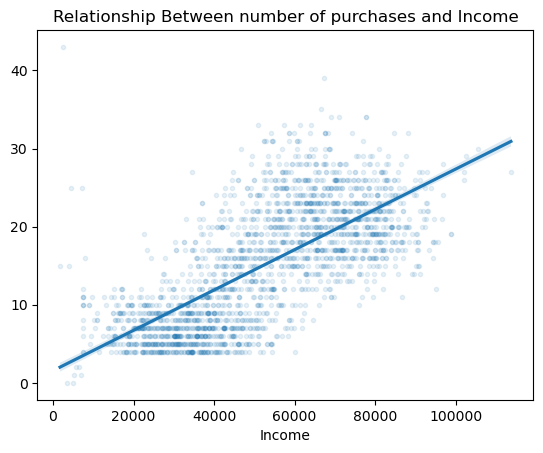

In [190]:
sumv = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
selsum = df[sumv].sum(axis = 1)
sns.regplot(x='Income', y= selsum, data=df, marker=".", scatter_kws={'alpha':0.1})
plt.title('Relationship Between number of purchases and Income')
plt.show()

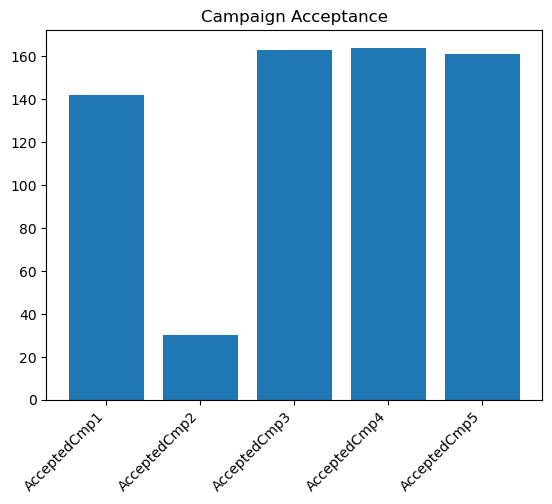

In [188]:
numse = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
selsum2 = df[numse].sum(axis=0)
plt.bar(selsum2.index, selsum2.values)
plt.xticks(rotation=45, ha='right')
plt.title('Campaign Acceptance')
plt.show()

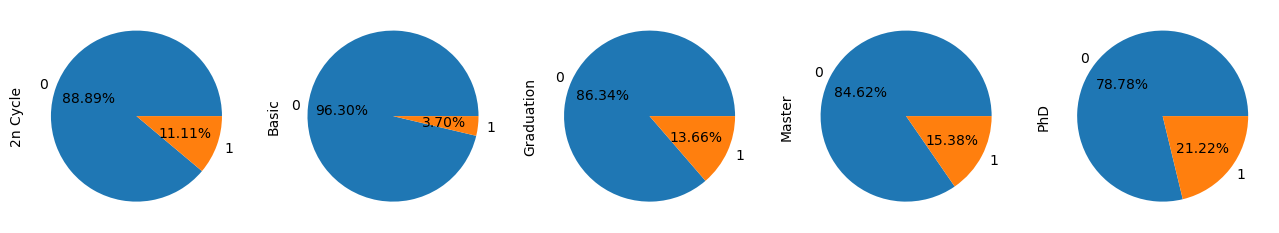

In [176]:
# response rate according to education
pd.crosstab(index=df['Response'], columns=df['Education']).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

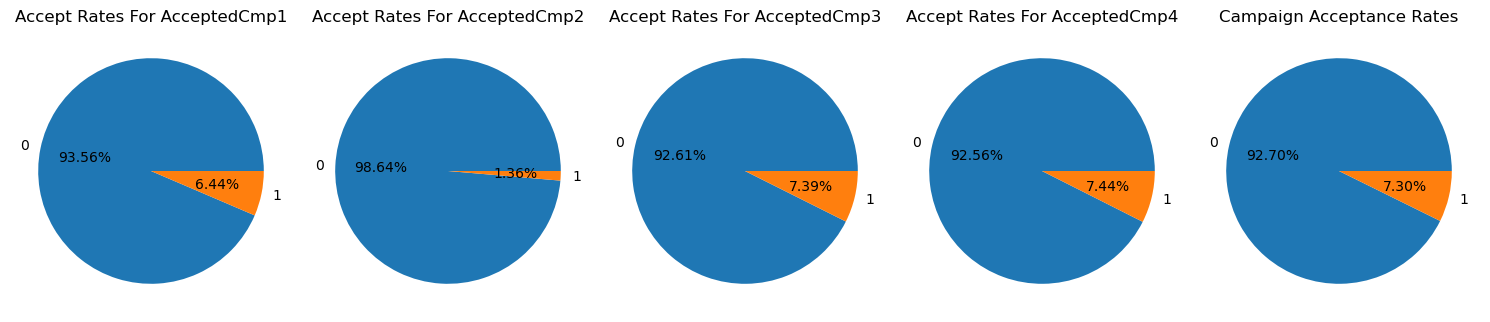

In [174]:
# Campaign Acceptance Rates
campaigns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]

fig, axs = plt.subplots(1, len(campaigns), figsize=(15, 4))

for idx, i in enumerate(campaigns):
    accept_rate = (df.groupby(i).size() / df[i].count()) * 100
    axs[idx].set_title(f"Accept Rates For {i}")
    axs[idx].pie(accept_rate, labels=df[i].unique(), autopct='%1.2f%%')
 
plt.tight_layout()
plt.show()

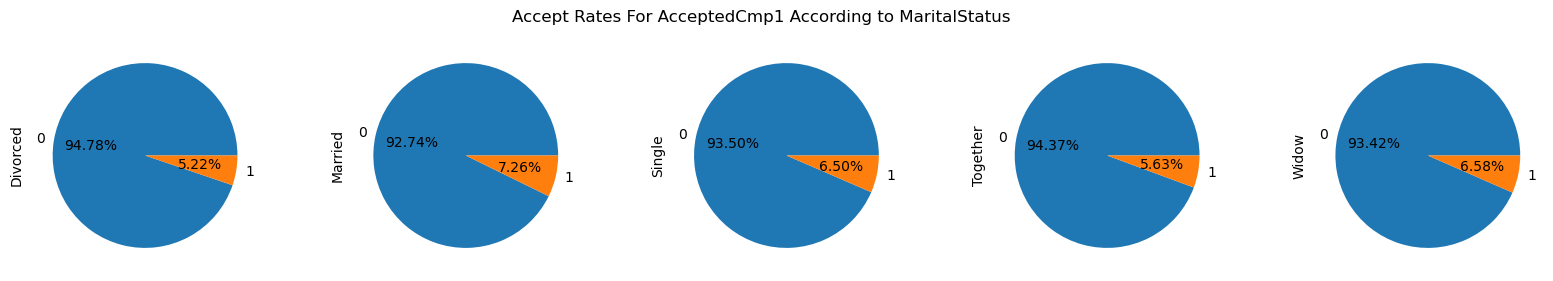

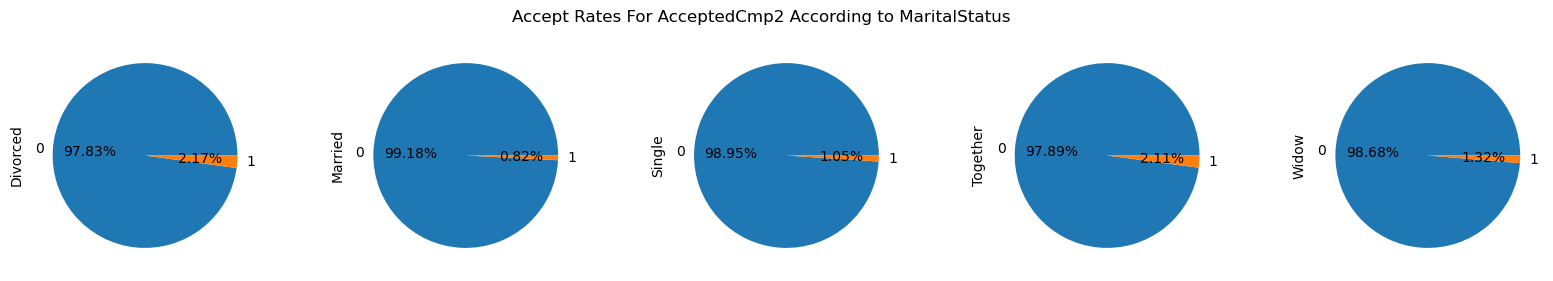

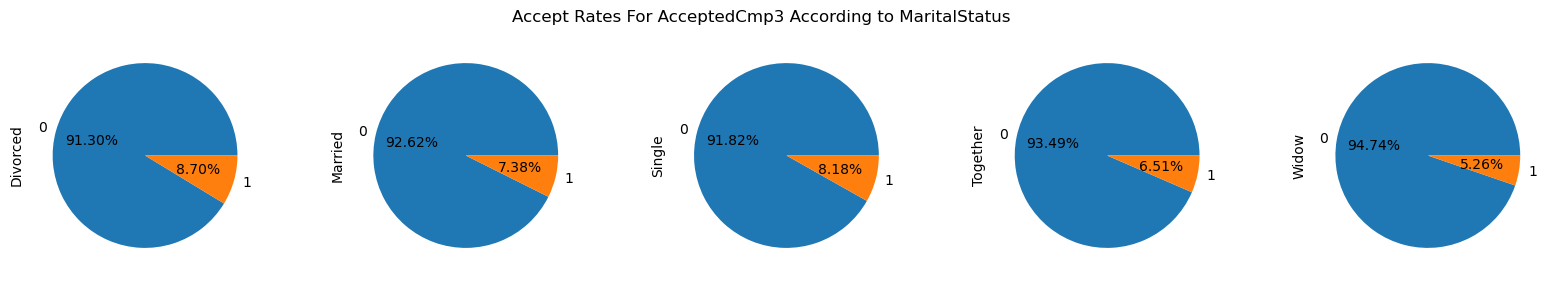

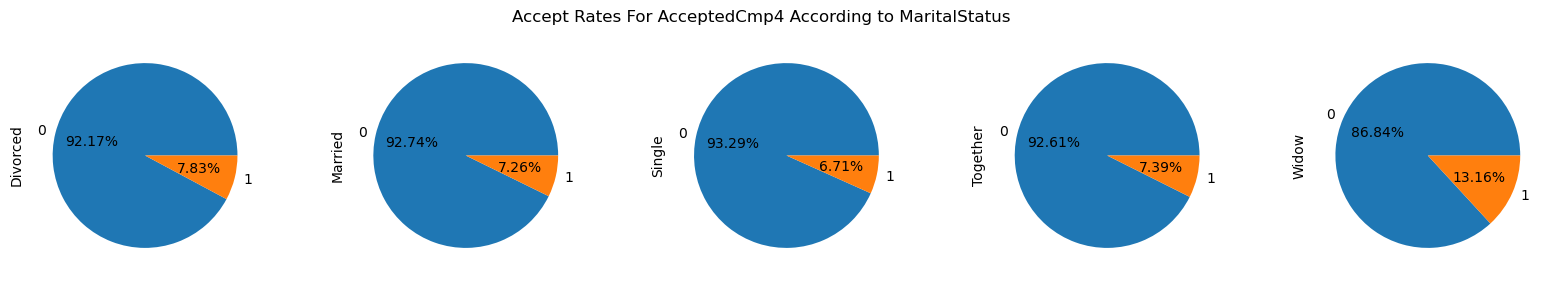

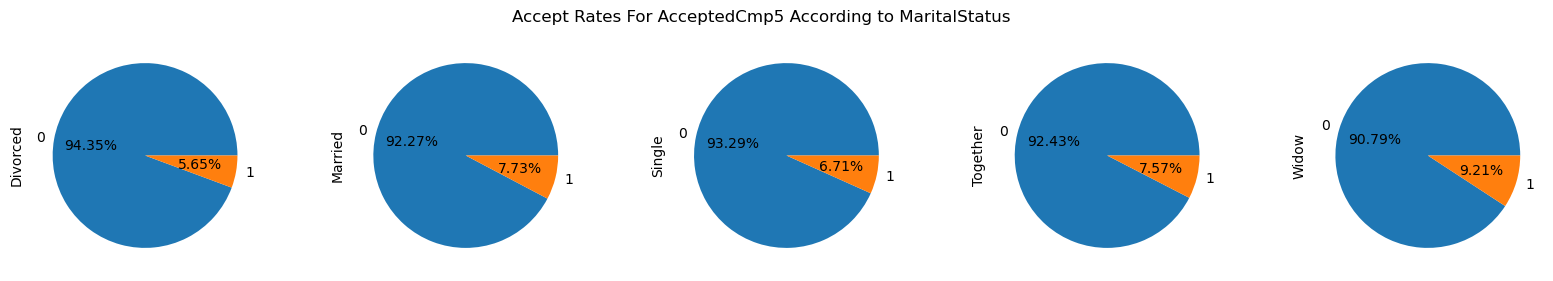

In [178]:
for i in campaigns:
    pd.crosstab(index= df[i] , columns=df['MaritalStatus']).plot(kind="pie", figsize=(20, 3), subplots=True, autopct='%1.2f%%',
                                                                     legend=False, title=f"Accept Rates For {i} According to MaritalStatus")
    plt.show()

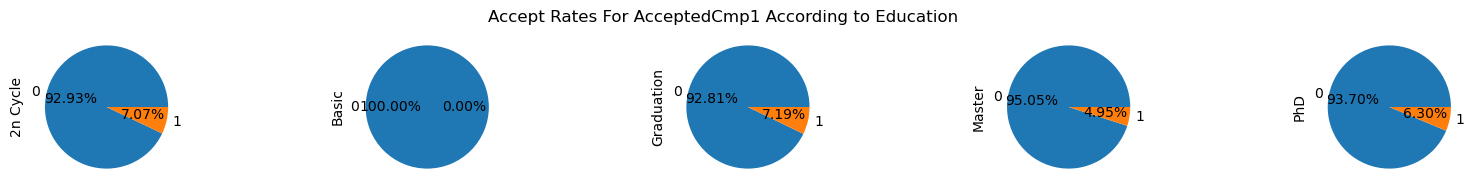

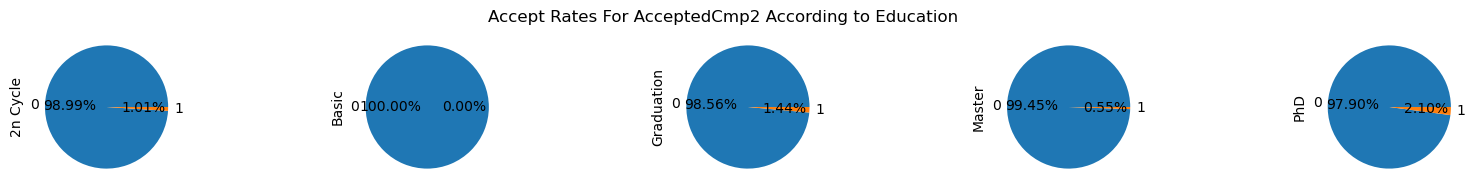

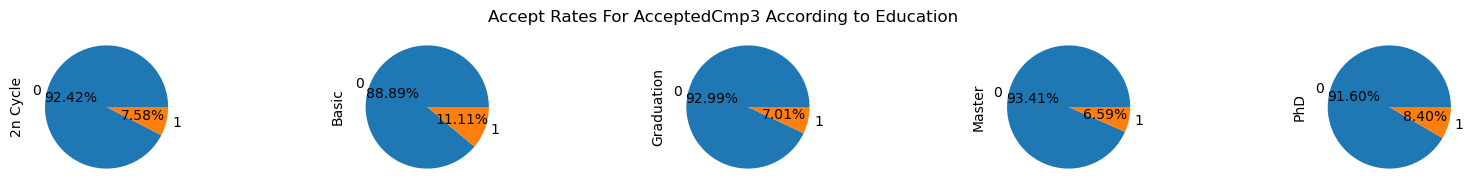

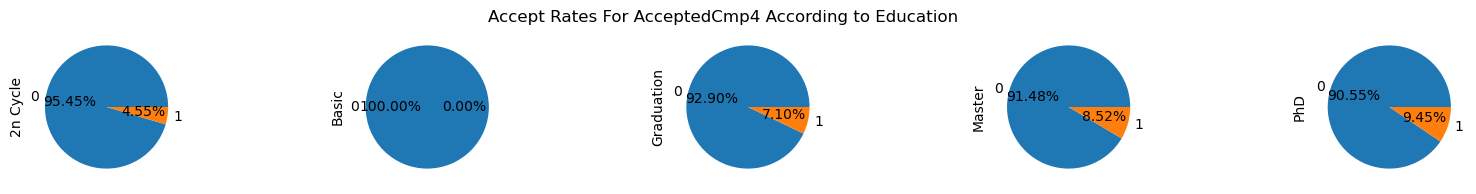

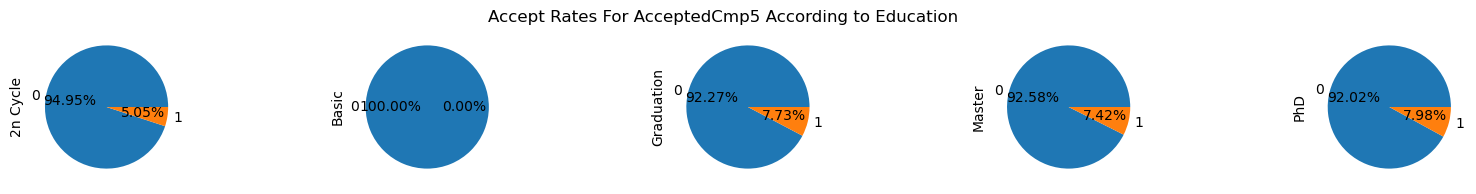

In [189]:
for i in campaigns:
    pd.crosstab(index= df[i] , columns=df['Education']).plot(kind="pie", figsize=(20, 2), subplots=True, autopct='%1.2f%%',
                                                                 legend=False, title=f"Accept Rates For {i} According to Education")
    plt.show()

In [210]:
df_plot = df.groupby(['MaritalStatus'])['Spent'].mean().reset_index()
fig5 = px.bar(df_plot, x='MaritalStatus', y='Spent', color='MaritalStatus', title = ' Average Spend by Marital Status')
fig5.show()

In [213]:
df_plot = df.groupby(['Education'])['Spent'].mean().reset_index()
fig6 = px.bar(df_plot, x='Education', y='Spent', color='Education', title = 'Average Spend by Education Level')
fig6.show()

In [219]:
df_plot = df.groupby(['NumChildren'])['Spent'].mean().reset_index()
fig7 = px.bar(df_plot, x='NumChildren', y='Spent', color='NumChildren', title = ' Average Spend by Number of Children in the household')
fig7.show()

##  Findings from Exploraty Data Analysis 

- Campaign 2 faced non-acceptance, unlike others which saw similar acceptance rates.
- Customers with a basic education level tended to reject the campaign.
- There is a positive correlation between the number of purchases and income, indicating that purchases increase with higher income levels.
- The highest spending is observed on wine, followed by meat products.
- Store purchases represent the most significant category of spending.
- On average, customers in the dataset are in a relationship, fall within the middle age range, don't have children and have completed college education.

# Clustering

These plots aim to visualize the relationship between marital status/education level and average spend, which can help to identify segments of customers with similar spending patterns.

### One-hot encoding

In [381]:
# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=["MaritalStatus", "Education"])
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Together,MaritalStatus_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,58138.0,58,635,88,546,172,88,88,3,8,...,False,False,True,False,False,False,False,True,False,False
1,46344.0,38,11,1,6,2,1,6,2,1,...,False,False,True,False,False,False,False,True,False,False
2,71613.0,26,426,49,127,111,21,42,1,8,...,False,False,False,True,False,False,False,True,False,False
3,26646.0,26,11,4,20,10,3,5,2,2,...,False,False,False,True,False,False,False,True,False,False
4,58293.0,94,173,43,118,46,27,15,5,5,...,False,True,False,False,False,False,False,False,False,True


In [382]:
df.drop(['Response', 'Complain', 'AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp5', 'Recency'], axis=1, inplace=True)

### Data Scaling StandardScaler

In [383]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
data = pd.DataFrame(scaler.transform(df), columns= df.columns )

### Dimensionality Reduction

In [384]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

### Kmeans

In [385]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

### Cluster

In [386]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=df.columns, index=df.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Together,MaritalStatus_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,cluster
0,0.314651,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,...,-0.795062,1.903324,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,1
1,-0.254877,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,...,-0.795062,1.903324,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,0
2,0.965354,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,...,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,2
3,-1.206087,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,...,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,0
4,0.322136,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,...,1.257763,-0.525397,-0.589047,-0.188938,-0.314093,-0.158444,-1.009570,-0.444656,1.905873,2


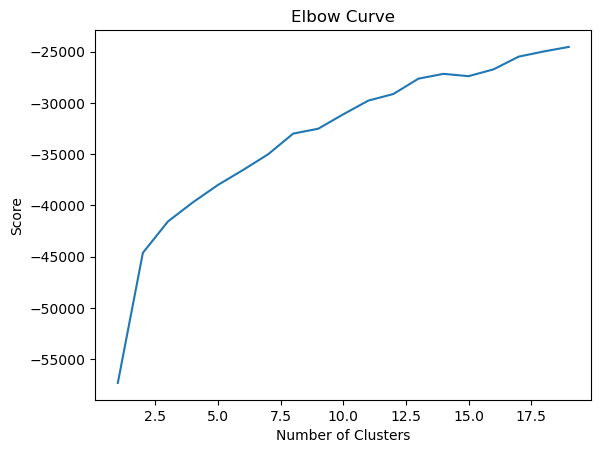

In [388]:
# Test for number of clusters
num_clusters = 20
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]
# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### PCA

In [389]:
from sklearn.decomposition import PCA
# we have 27 dimensions which is hard to vizualize so we reduce to 3 dimensions
# Create a PCA model to reduce our data to 3 dimensions for visualisation
pca = PCA(n_components=3)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [393]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=df.index, columns=['PC1','PC2', 'PC3'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,PC3,cluster
0,4.193612,-1.646199,-0.475359,1
1,-2.274277,-1.412008,0.091132,0
2,1.764076,-0.142481,-0.893207,2
3,-2.640090,-0.755795,-1.064645,0
4,-0.320249,1.461432,0.227787,2


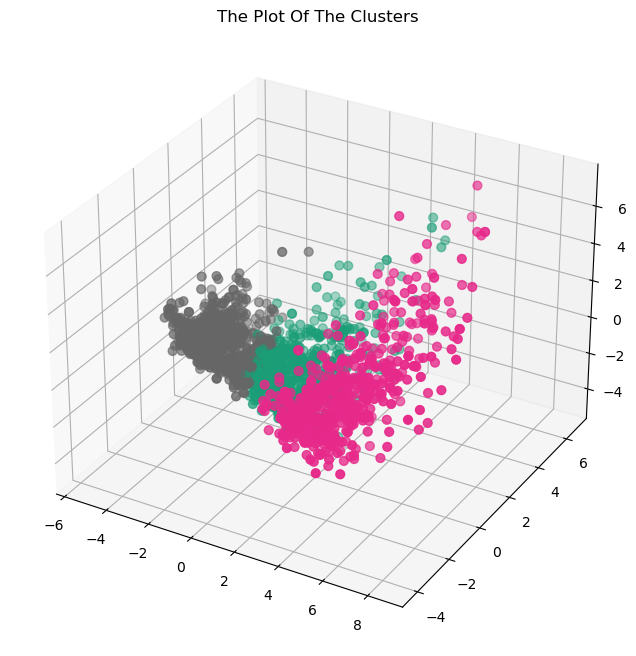

In [416]:
#Plotting the clusters
x =PCA_ds["PCA1"]
y =PCA_ds["PCA2"]
z =PCA_ds["PCA3"]
pal = ["#682F2F","#B9C0C9", "#9F8A78"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=X_reduceddf["cluster"], marker='o', cmap="Dark2_r")
ax.set_title("The Plot Of The Clusters")
plt.show()

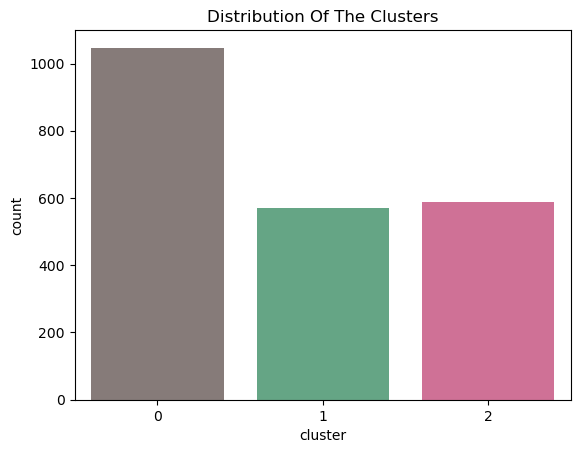

In [438]:
#Plotting countplot of clusters
pal = ["#887A77","#5AB085", "#DF6193"]
pl = sns.countplot(x=X_reduceddf["cluster"], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

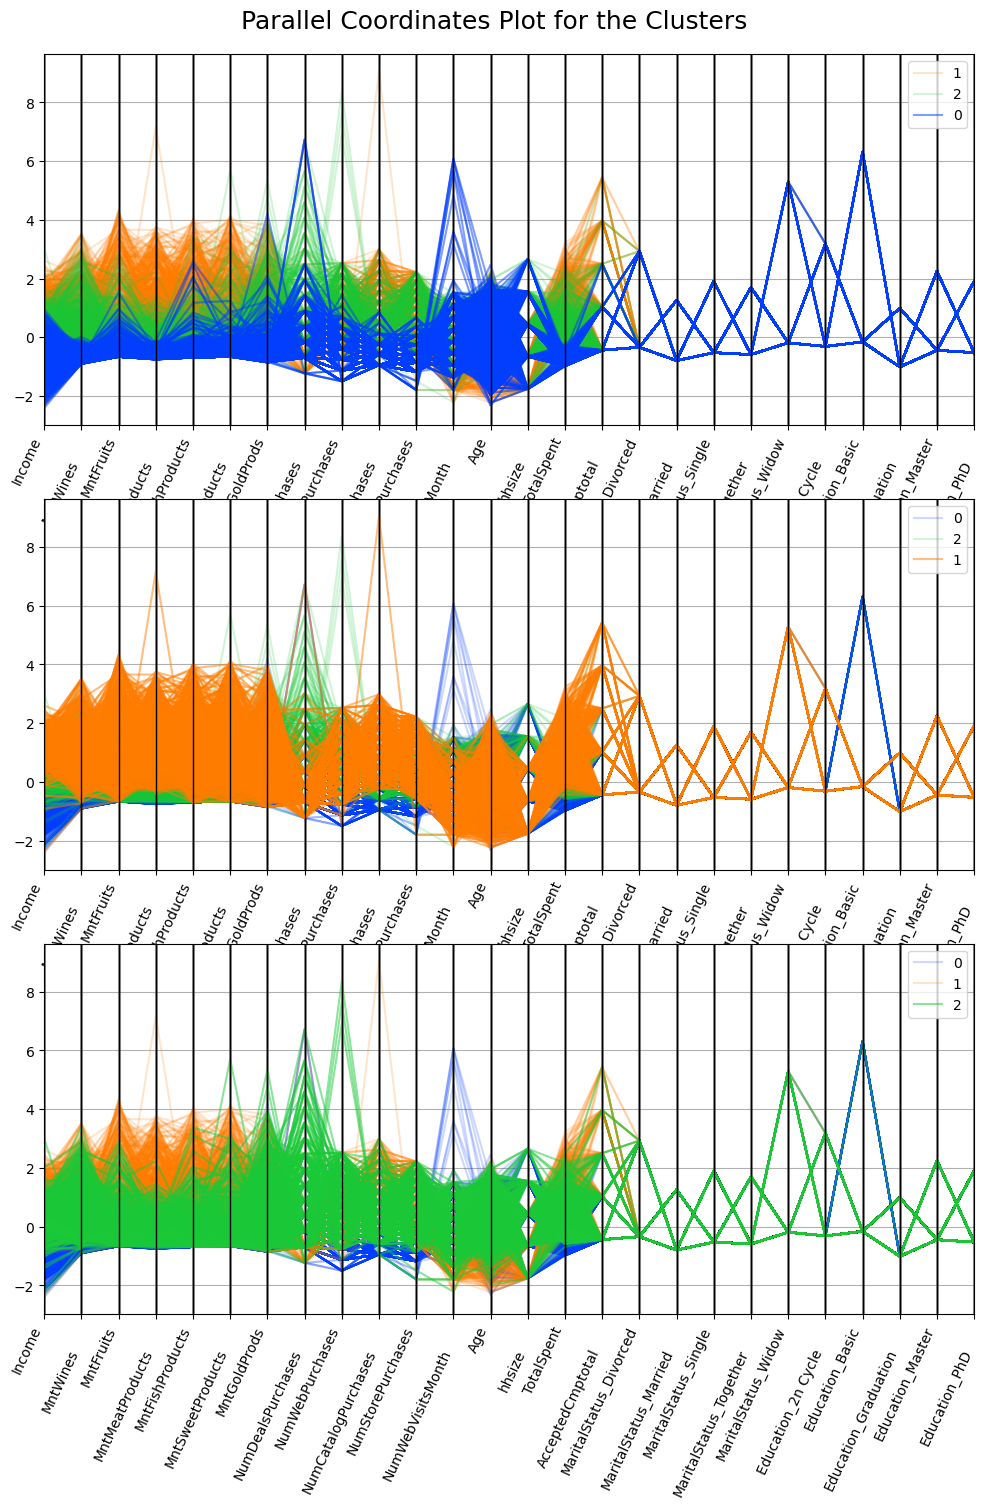

In [444]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=df.index, columns=df.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 3)

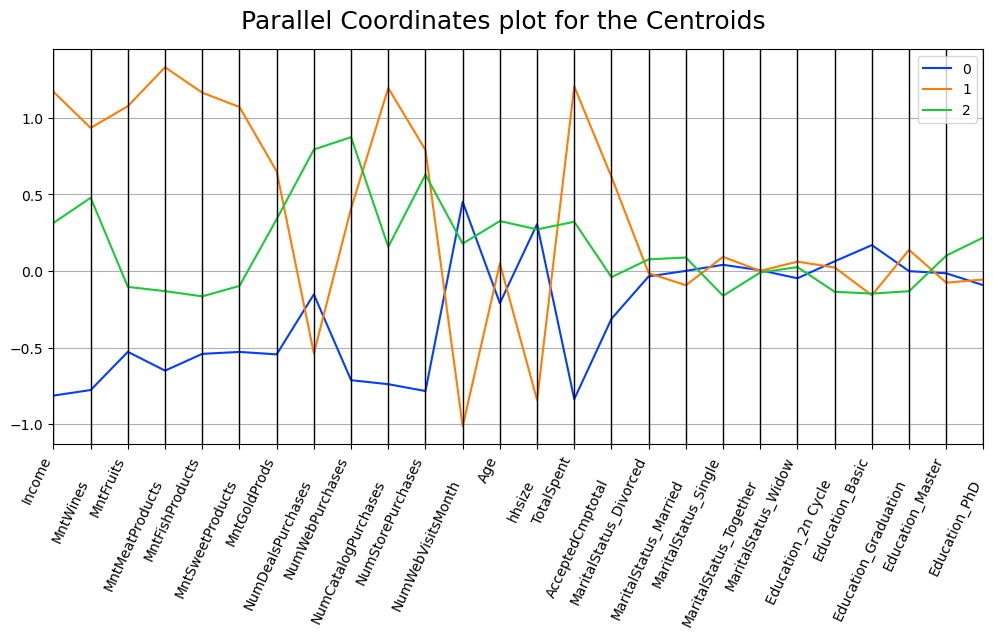

In [442]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

In [ ]:
palette = sns.color_palette("bright", 10)

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)
        plt.xticks(rotation = 65, ha='right') 


def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)  
    plt.xticks(rotation = 65, ha='right') 

## Findings from Clustering


The segmentation analysis resulted in three distinct clusters. Notably, one cluster stands out with the highest total spending and income, coupled with the smallest household size, primarily engaging in catalog purchases. In contrast, the second cluster exhibits the lowest income and spending, with similar patterns as the third cluster even thought exhibits a median spending and income level. An intriguing distinction emerges, as the third cluster demonstrates positive responsiveness to deals and campaigns, whereas the second cluster responds less favorably, despite having the highest number of web visits.

### Recommendations

Tailoring marketing strategies to each cluster is crucial for maximizing revenue and customer satisfaction. For the cluster characterized by the highest total spending and income, the focus should be on enhancing the catalog purchase experience. Employ targeted promotions and exclusive deals for other groceries products that aren't meats and wines, as they are the most purchased. For the second cluster with lower income and spending levels, as they don't respond well to campaign and deals, is better to not target them. But if targeted, leverage data from web visits to understand their preferences, and deploy only online campaigns that resonate with their interests. Building a value proposition that aligns with their budgetary considerations will be instrumental in encouraging repeat transactions. Lastly, the third cluster, exhibiting median spending and income levels, showcases a positive response to deals and campaigns. Capitalize on this responsiveness by designing targeted promotions and exclusive offers tailored to their preferences, which show to be daily groceries products from larger households. 